This notebook test the function that takes subset from original output files.

In [24]:
import netCDF4 as nc
import matplotlib.pyplot as plt
import numpy as np
import copy
import os
import glob
% matplotlib inline

nc_filename=sorted(glob.glob('Test.nc'))#*_ptrc_T*.nc'))
print("found *.nc file: \n{}".format(nc_filename))

found *.nc file: 
['Test.nc']


# Before taking subsets from the original file

In [28]:
ptrc=nc.Dataset(nc_filename[0])
TR_7all=ptrc.variables['TR_7'][:,:,:,:]

0


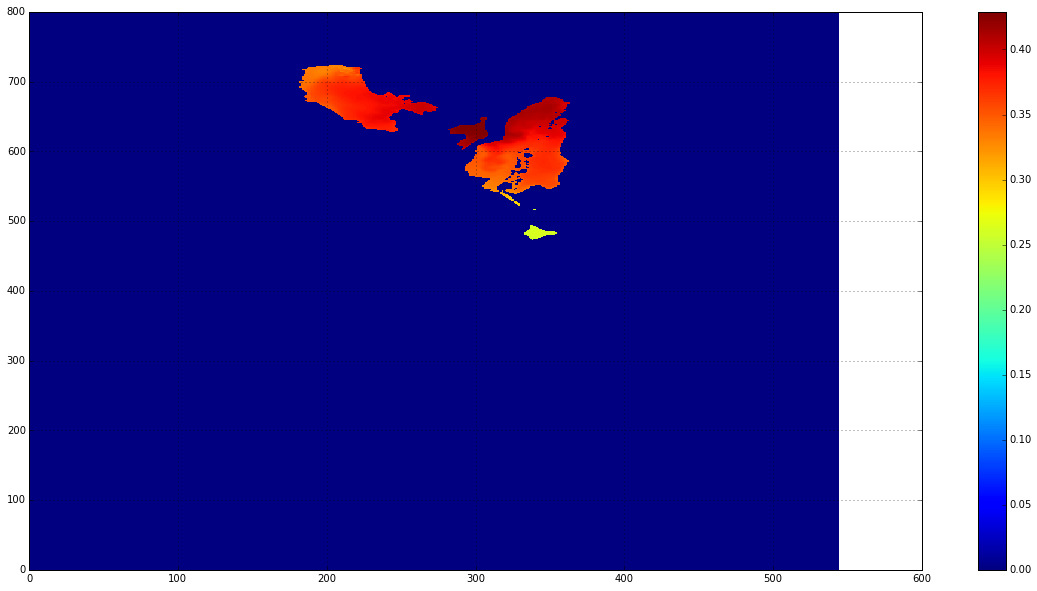

In [29]:
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(1,len(nc_filename),k+1)
plt.pcolor(TR_7all[-1,44,:,:])
plt.colorbar()
print len(jj)
plt.scatter(jj,ii,color='grey',s=10)
plt.title('%s'%nc_filename[k][0:-10])
plt.grid(True)
plt.show()

# Take subsets

In [8]:
ptrc=nc.Dataset(nc_filename[0])
TR_7=ptrc.variables['TR_7'][:,:,400:,:]  #(12, 50, 800, 544)
TR_8=ptrc.variables['TR_8'][:,:,400:,:]
TR_9=ptrc.variables['TR_9'][:,:,400:,:]
TR_10=ptrc.variables['TR_10'][:,:,400:,:]
TR_11=ptrc.variables['TR_11'][:,:,400:,:]
TR_12=ptrc.variables['TR_12'][:,:,400:,:]
lon=ptrc.variables['nav_lon'][400:,:]
lat=ptrc.variables['nav_lat'][400:,:]
dep = ptrc.variables['deptht'][:]

In [22]:
xmax = lat.shape[1]
ymax = lat.shape[0]
depthtmax = dep.shape[0]
os.remove('cut_%s.nc'%nc_filename)
nemo = nc.Dataset('cut_%s.nc'%nc_filename, 'w')
nemo.description = '%s'%nc_filename 

# dimensions
nemo.createDimension('x', xmax)
nemo.createDimension('y', ymax)
nemo.createDimension('deptht',depthtmax)
nemo.createDimension('time_counter', None)

# variables
# latitude and longitude
my_lat = nemo.createVariable('nav_lat','float32',('y','x'),zlib=True)
my_lat[:,:] = lat[:,:] 
x = nemo.createVariable('nav_lon','float32',('y','x'),zlib=True)
x[:,:]  = lon[:,:] 
# depth
depth = nemo.createVariable('deptht', 'float32', ('deptht'),zlib=True)
depth.units = 'meter'
depth[:] = dep[:]

TR_7new = nemo.createVariable('TR_7', 'float32', ('time_counter','deptht','y','x'), zlib=True)
TR_7new[:,:,:,:]=TR_7[:,:,:,:]
TR_8new = nemo.createVariable('TR_8', 'float32', ('time_counter','deptht','y','x'), zlib=True)
TR_8new[:,:,:,:]=TR_8[:,:,:,:]
TR_9new = nemo.createVariable('TR_9', 'float32', ('time_counter','deptht','y','x'), zlib=True)
TR_9new[:,:,:,:]=TR_9[:,:,:,:]
TR_10new = nemo.createVariable('TR_10', 'float32', ('time_counter','deptht','y','x'), zlib=True)
TR_10new[:,:,:,:]=TR_10[:,:,:,:]
TR_11new = nemo.createVariable('TR_11', 'float32', ('time_counter','deptht','y','x'), zlib=True)
TR_11new[:,:,:,:]=TR_11[:,:,:,:]
TR_12new = nemo.createVariable('TR_12', 'float32', ('time_counter','deptht','y','x'), zlib=True)
TR_12new[:,:,:,:]=TR_12[:,:,:,:]
nemo.close()

In [23]:
ptrc=nc.Dataset('cut_%s.nc'%nc_filename)
print ptrc.variables
lat=ptrc.variables['nav_lat'][:]
dept=ptrc.variables['deptht'][:]
TR_7=ptrc.variables['TR_7'][:]

OrderedDict([(u'nav_lat', <netCDF4.Variable object at 0x7f0abbdf7b98>), (u'nav_lon', <netCDF4.Variable object at 0x7f0abbdf7e90>), (u'deptht', <netCDF4.Variable object at 0x7f0abbdf7f28>), (u'TR_7', <netCDF4.Variable object at 0x7f0abbdf7050>), (u'TR_8', <netCDF4.Variable object at 0x7f0abbdf7478>), (u'TR_9', <netCDF4.Variable object at 0x7f0abbdf7808>), (u'TR_10', <netCDF4.Variable object at 0x7f0abbdf76d8>), (u'TR_11', <netCDF4.Variable object at 0x7f0abbdf78a0>), (u'TR_12', <netCDF4.Variable object at 0x7f0abbdf7770>)])


0


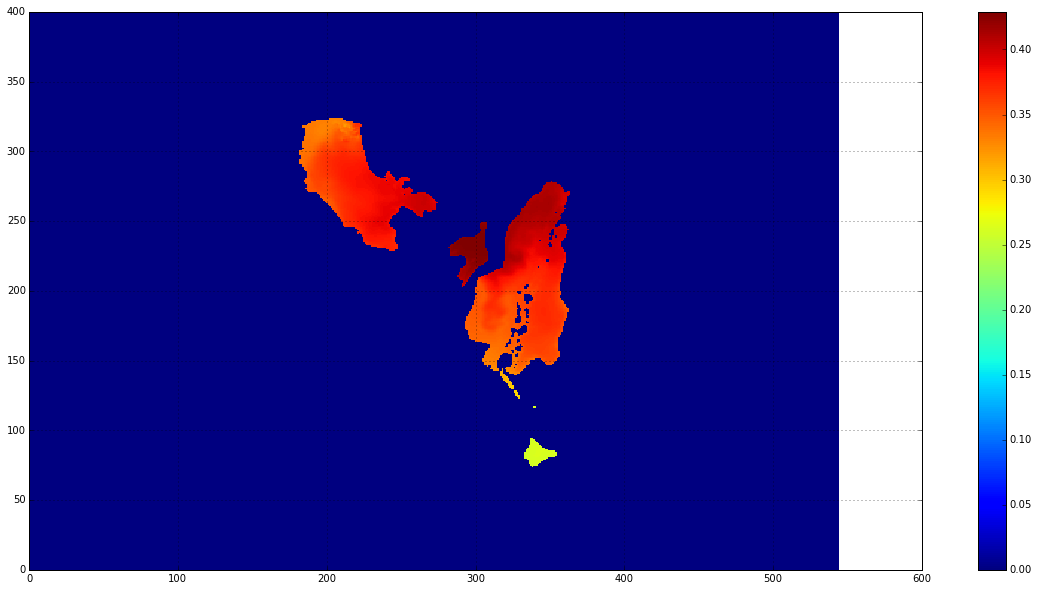

In [20]:
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(1,len(nc_filename),k+1)
plt.pcolor(TR_7[-1,44,:,:])
plt.colorbar()
print len(jj)
plt.scatter(jj,ii,color='grey',s=10)
plt.title('%s'%nc_filename[k][0:-10])
plt.grid(True)
plt.show()